In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
kidney_df=pd.read_csv('kidney-stone-detection.csv')

In [14]:
kidney_df

,gravity,ph,osmolality,conductivity,urea,calcium,target
0,1.021,4.91,725,14.00,443,2.45,0
1,1.017,5.74,577,20.00,296,4.49,0
2,1.008,7.20,321,14.90,101,2.36,0
3,1.011,5.51,408,12.60,224,2.15,0
4,1.005,6.52,187,7.50,91,1.16,0
...,...,...,...,...,...,...,...
97,1.090,6.19,379,11.28,196,2.50,1
98,1.101,6.92,452,21.49,133,1.27,1
99,1.122,6.11,452,20.70,408,4.18,1
100,1.121,6.02,375,11.01,170,3.10,1


In [17]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gravity       102 non-null    float64
 1   ph            102 non-null    float64
 2   osmolality    102 non-null    int64  
 3   conductivity  102 non-null    float64
 4   urea          102 non-null    int64  
 5   calcium       102 non-null    float64
 6   target        102 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 5.7 KB


In [22]:
kidney_df.describe()

,gravity,ph,osmolality,conductivity,urea,calcium,target
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.025830,6.010476,608.823529,20.797371,263.764706,4.252362,0.558824
std,0.025374,0.690067,234.320227,7.530517,133.335665,3.193619,0.498980
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.013201,5.536520,418.750000,14.650000,159.000000,1.482500,0.000000
50%,1.020000,5.905000,577.000000,21.391198,253.500000,3.331046,1.000000
75%,1.025000,6.365000,780.500000,26.100000,366.250000,6.153294,1.000000
max,1.151000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [26]:
kidney_df.columns

Index(['gravity', 'ph', 'osmolality', 'conductivity', 'urea', 'calcium',
       'target'],
      dtype='object')

In [28]:
kidney_df.shape

(102, 7)

In [31]:
type(kidney_df)

pandas.core.frame.DataFrame

In [40]:
count_ones = kidney_df['target'].value_counts()[1]
print(count_ones)


57


In [42]:
count_zeroes = kidney_df['target'].value_counts()[0]
print(count_zeroes)


45


In [51]:
kidney_df['target'].count()

102

In [59]:
stone_detected_rate=((count_ones)/(kidney_df['target'].count()))*100
print('kidney stone detected rate is:',stone_detected_rate)

kidney stone detected rate is: 55.88235294117647


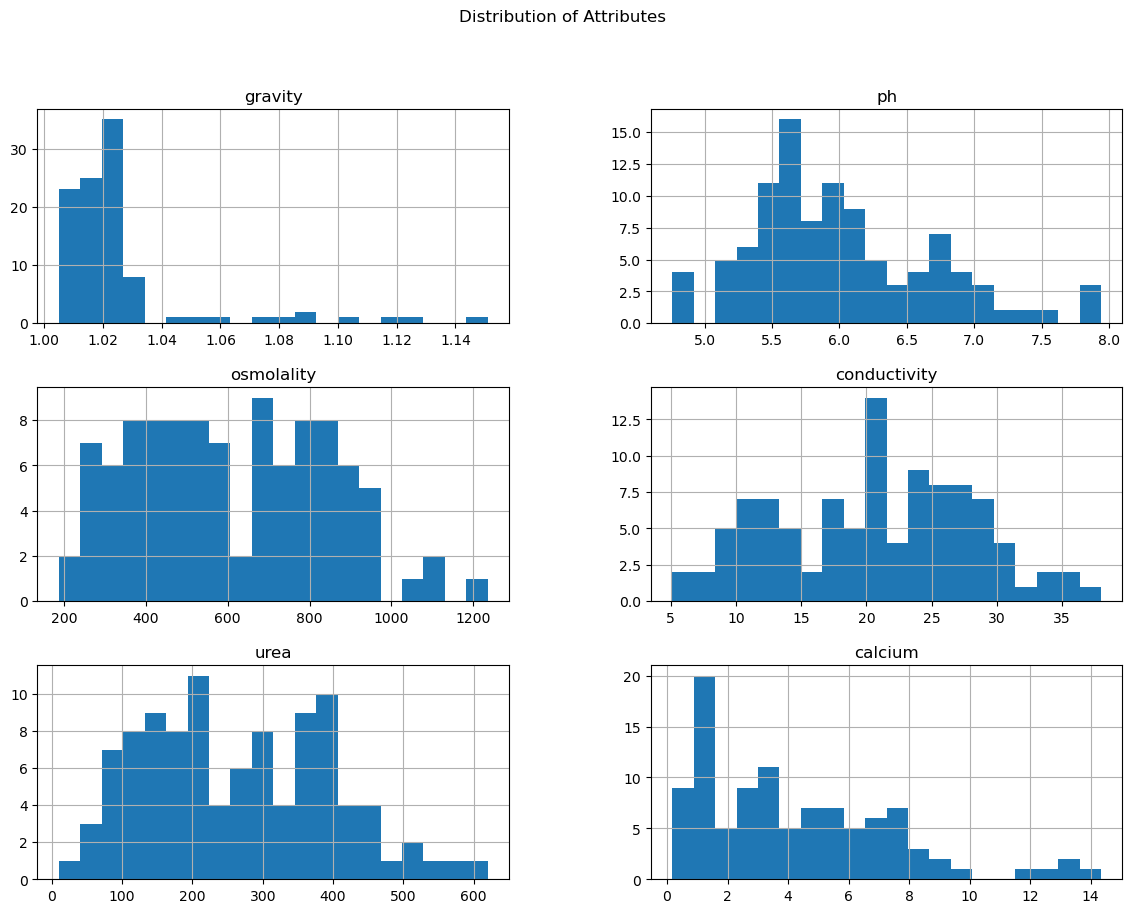

In [64]:
attributes = ['gravity', 'ph', 'osmolality', 'conductivity', 'urea', 'calcium']

kidney_df[attributes].hist(bins=20, figsize=(14, 10))
plt.suptitle('Distribution of Attributes')
plt.show()

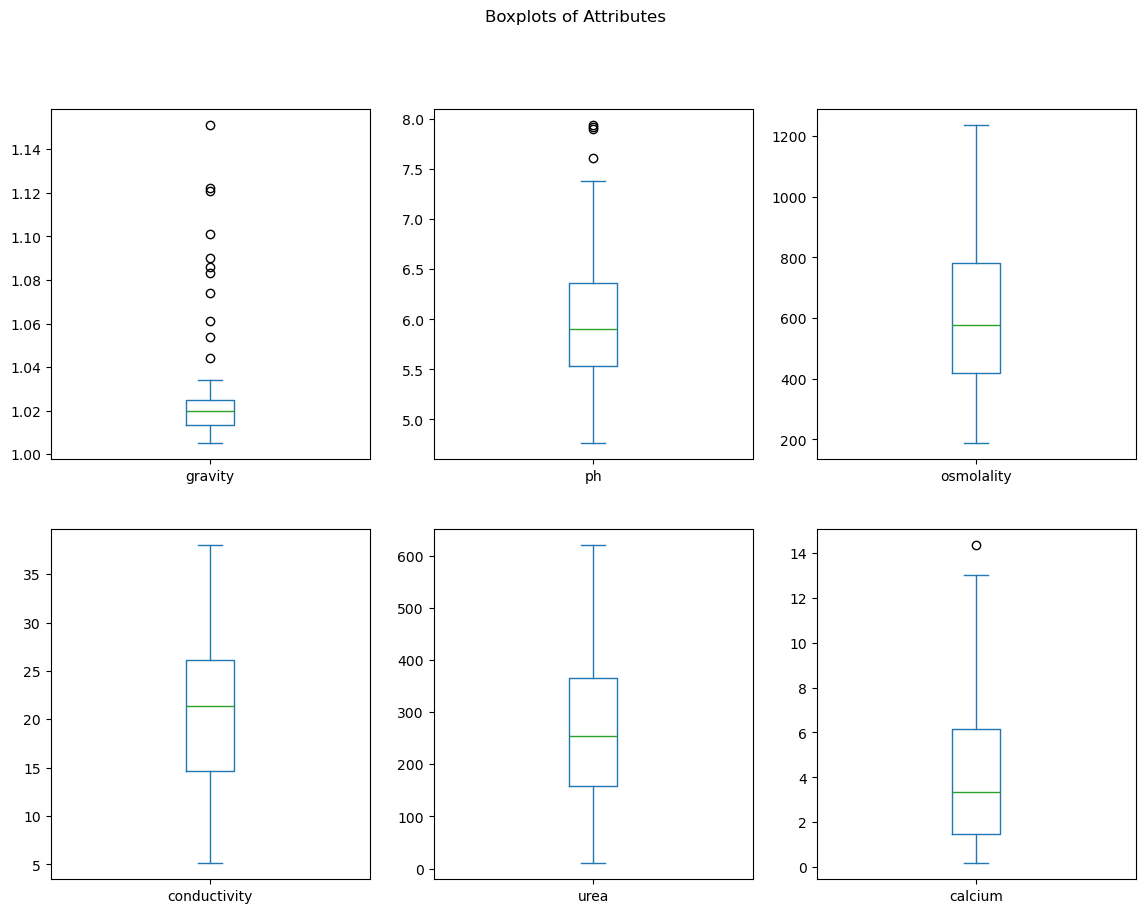

In [68]:
kidney_df[attributes].plot(kind='box', subplots=True, layout=(2, 3), figsize=(14, 10), sharex=False, sharey=False)
plt.suptitle('Boxplots of Attributes')
plt.show()

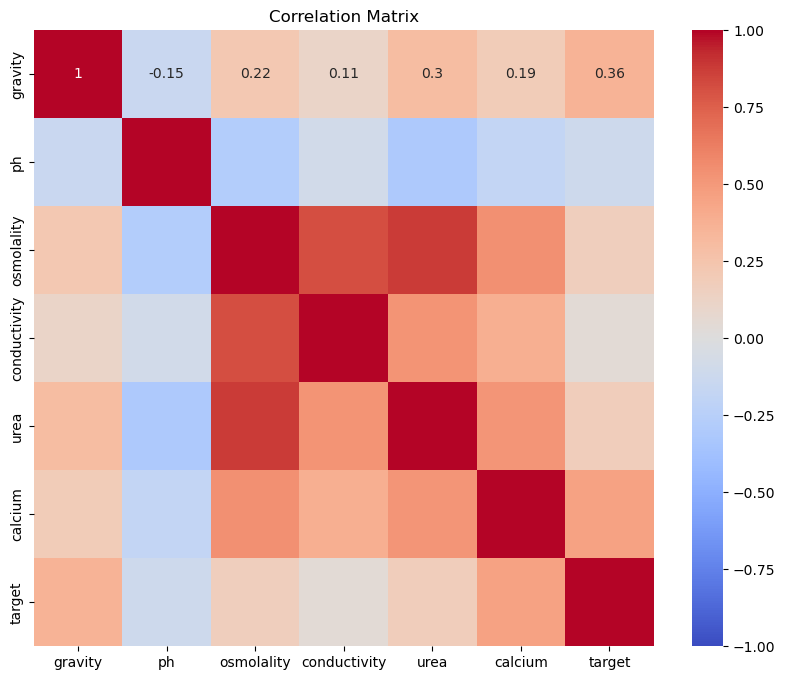

In [74]:
correlation_matrix = kidney_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

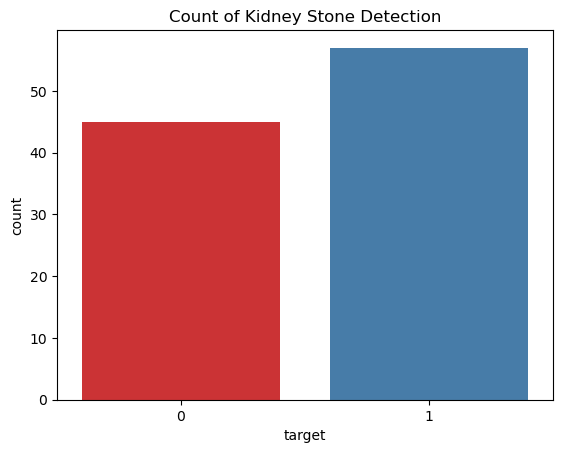

In [10]:
#Distribution of Target Variable:
sns.countplot(x='target', data=kidney_df, palette='Set1')
plt.title('Count of Kidney Stone Detection')
plt.show()

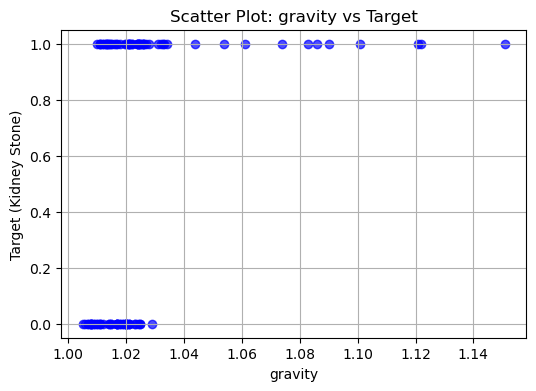

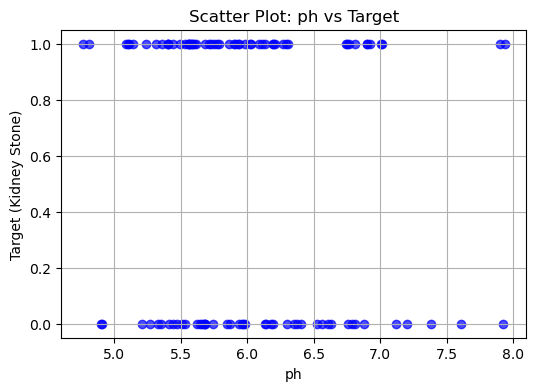

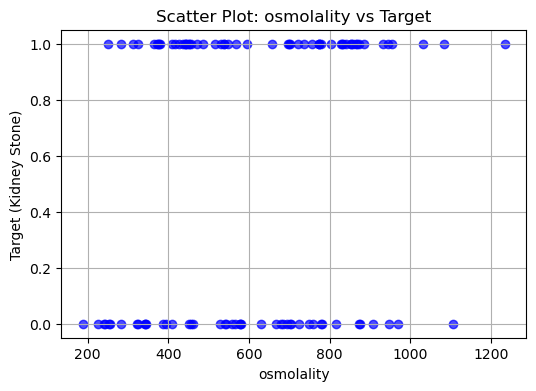

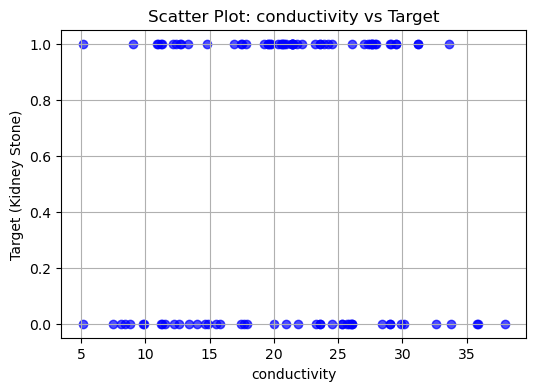

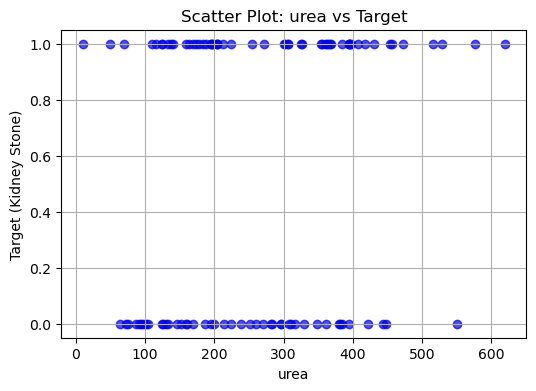

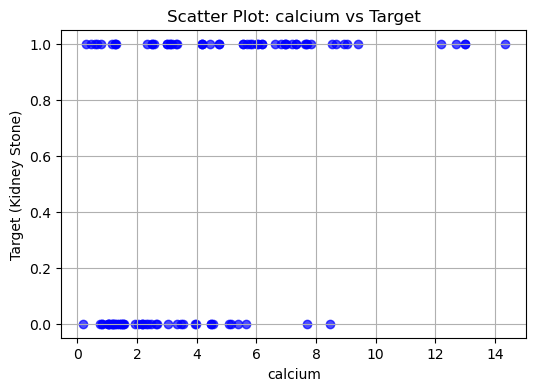

In [12]:
# Scatter plot for each continuous variable with target
for col in kidney_df.columns:
    if col not in ["target"]:
        plt.figure(figsize=(6, 4))
        plt.scatter(kidney_df[col], kidney_df["target"], color="blue", alpha=0.7)
        plt.xlabel(col)
        plt.ylabel("Target (Kidney Stone)")
        plt.title(f"Scatter Plot: {col} vs Target")
        plt.grid(True)
        plt.show()

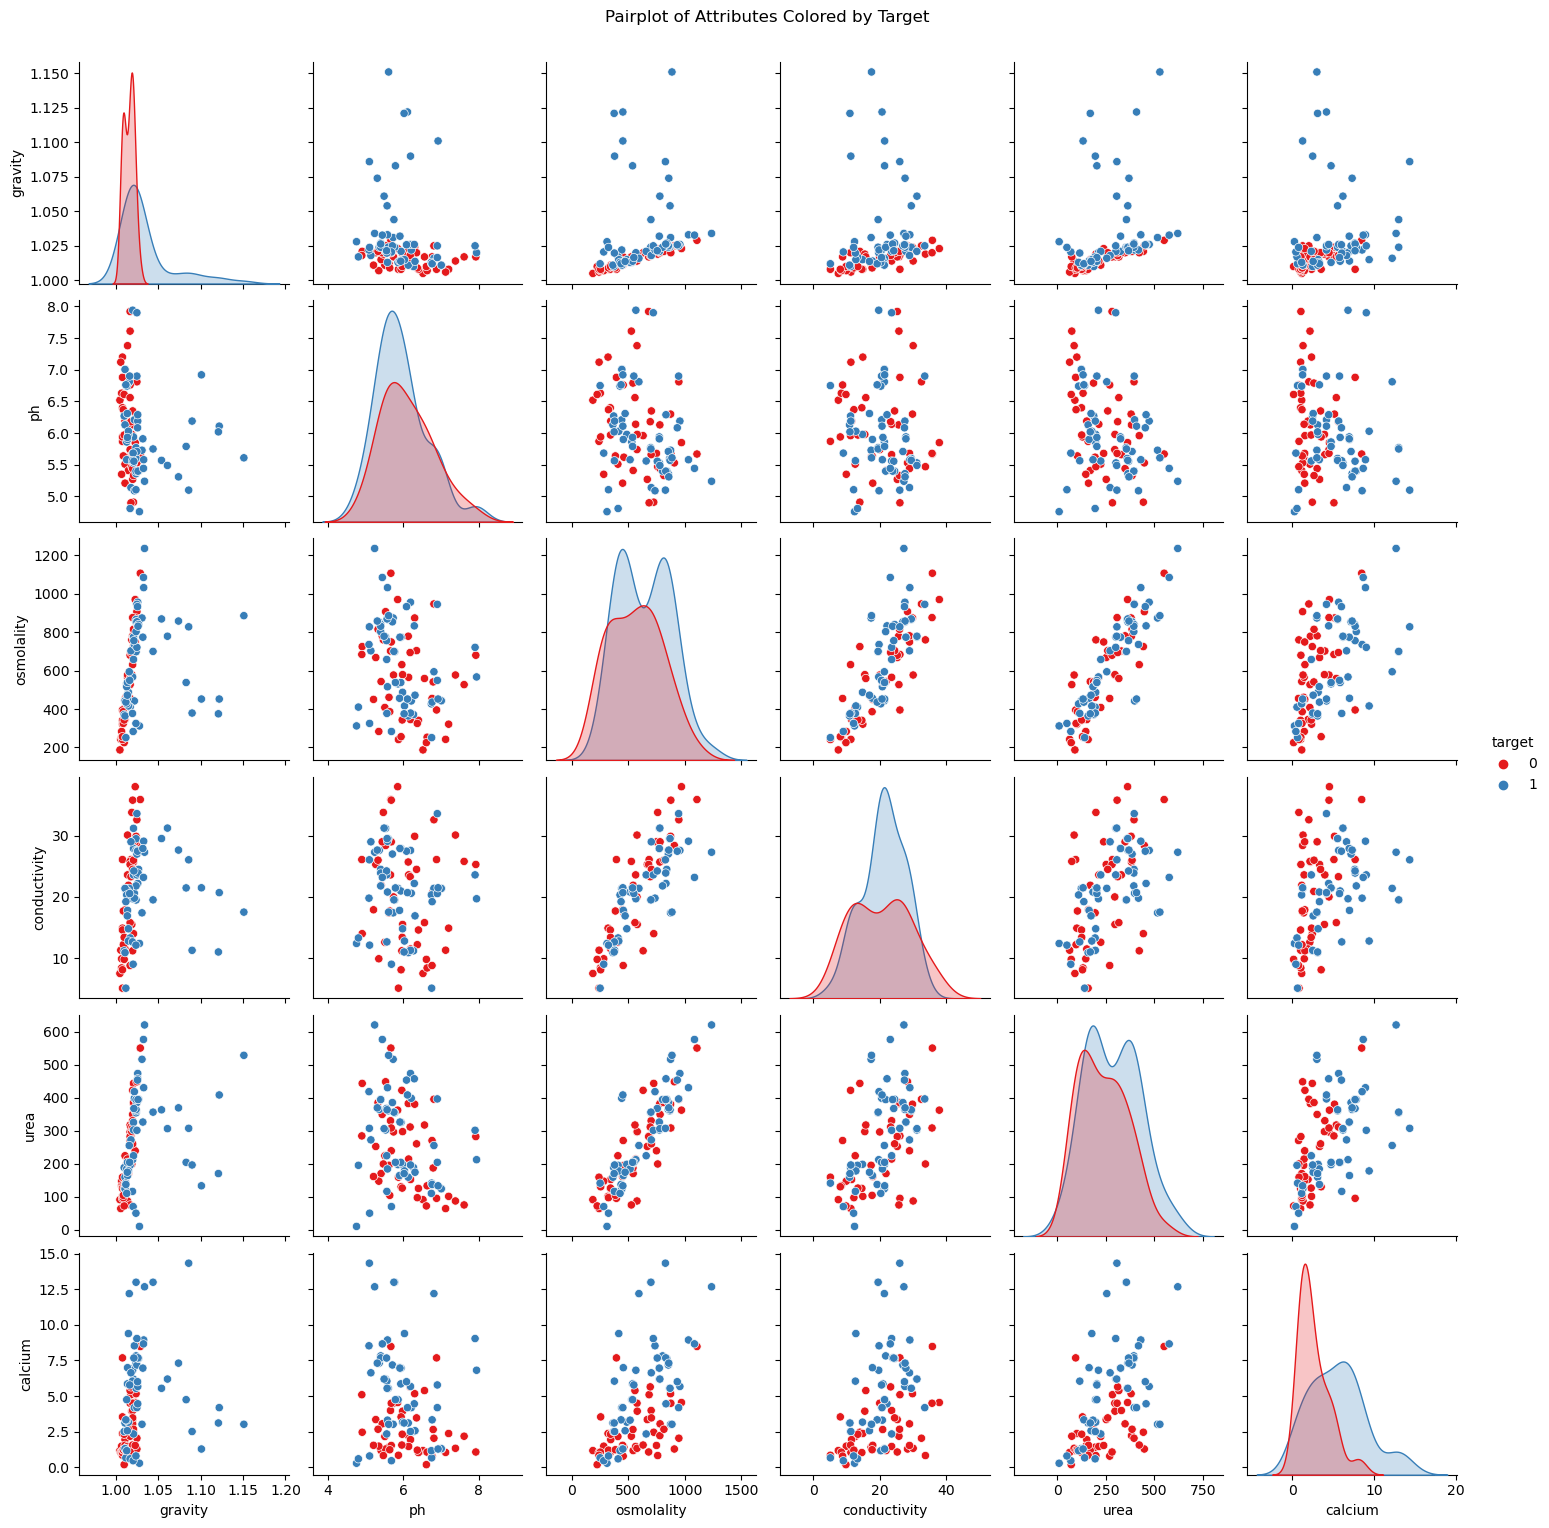

In [21]:
# Using seaborn for pairplots
sns.pairplot(kidney_df, hue='target', diag_kind='kde', palette='Set1')
plt.suptitle('Pairplot of Attributes Colored by Target', y=1.02)
plt.show()

In [15]:
from scipy import stats

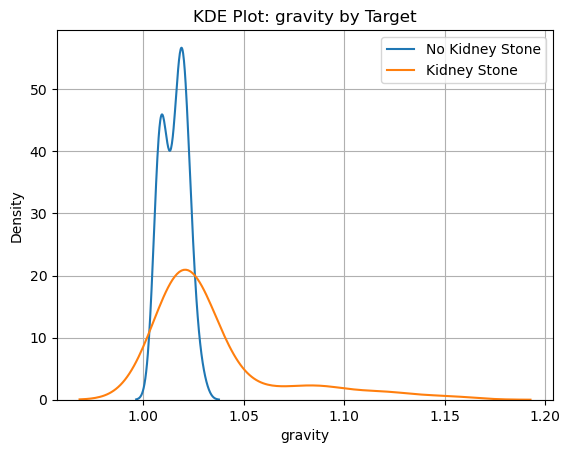

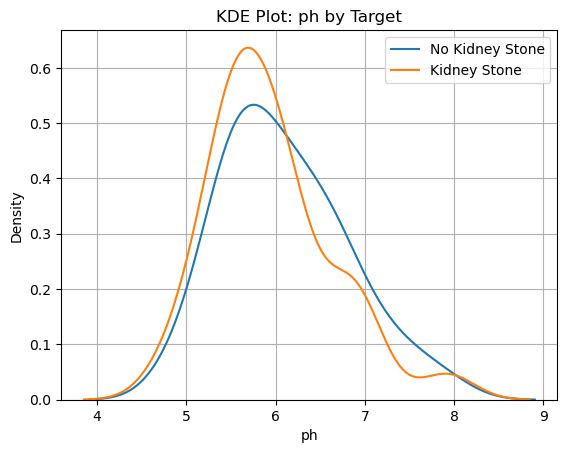

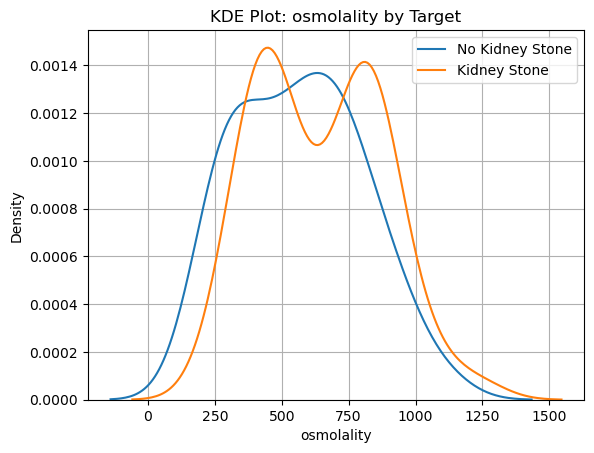

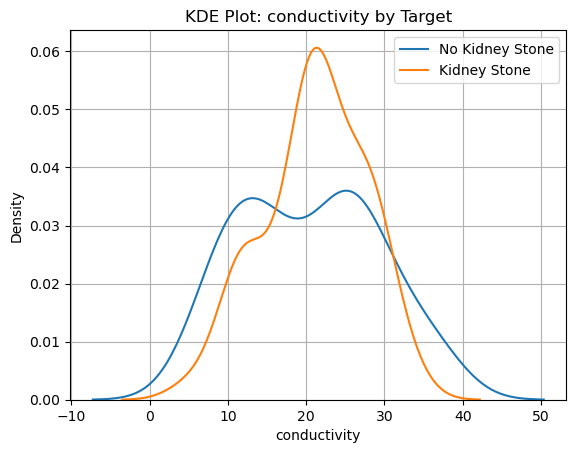

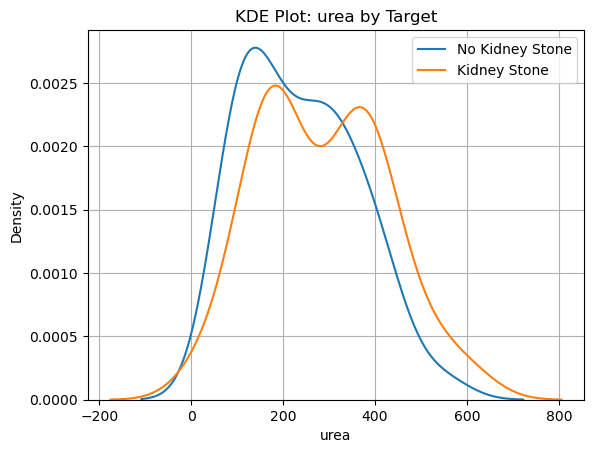

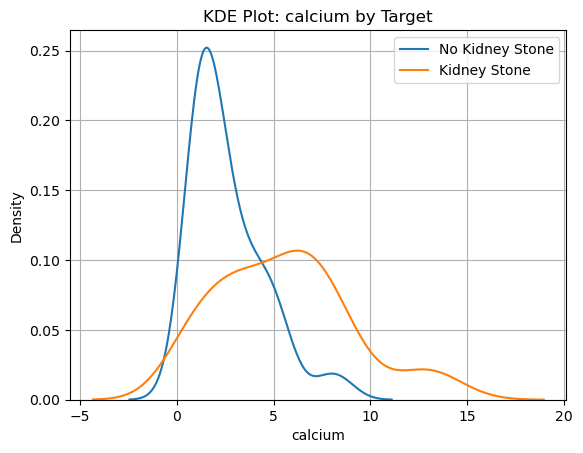

In [20]:
#Kernel Density Estimation (KDE) Plots
# Function to create conditional KDE plots
def plot_kde(kidney_df, variable):
    sns.kdeplot(kidney_df[variable][kidney_df["target"] == 0], label="No Kidney Stone")
    sns.kdeplot(kidney_df[variable][kidney_df["target"] == 1], label="Kidney Stone")
    plt.xlabel(variable)
    plt.ylabel("Density")
    plt.title(f"KDE Plot: {variable} by Target")
    plt.legend()
    plt.grid(True)
    plt.show()
for col in kidney_df.columns:
    if col not in ["target"]:
        plot_kde(kidney_df.copy(), col)    